In [418]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)

print('Age:')
t, p = stats.ttest_ind(df['age'][df['group'] == 'Waitlist'], df['age'][df['group'] == 'Intervention'])
print('Intervention mean, std: ', df['age'][df['group'] == 'Intervention'].mean(), df['age'][df['group'] == 'Intervention'].std())
print('Waitlist mean, std: ', df['age'][df['group'] == 'Waitlist'].mean(), df['age'][df['group'] == 'Waitlist'].std())
print('t: ',t, ' p: ',p, '\n')

print('Ethnicity:')
observations = pd.crosstab(index=df["eth_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)


print('\n\nEmployment:')
observations = pd.crosstab(index=df["employ_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)


print('\n\Education:')
observations = pd.crosstab(index=df["edu_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)


print('\n\Previous app use:')
observations = pd.crosstab(index=df["apps_original"], columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)



Age:
Intervention mean, std:  29.076923076923077 4.100914072406411
Waitlist mean, std:  27.46 4.607934594207019
t:  -1.8737644492930094  p:  0.0638826018839124 

Ethnicity:
group                         Intervention  Waitlist
eth_original                                        
Asian/Asian British                      1         3
Black/Black British                      2         2
Mixed/Multiple ethnic groups             6         2
White/White British                     43        43
chi2 =  2.9619230769230773
p =  0.39753322332500296


Employment:
group                                               Intervention  Waitlist
employ_original                                                           
Student                                                        5         7
Temporarily away from work due to illness, mate...             2         0
Unable to work due to disability or any other r...             1         1
Unemployed                                                     2    

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1096194834.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


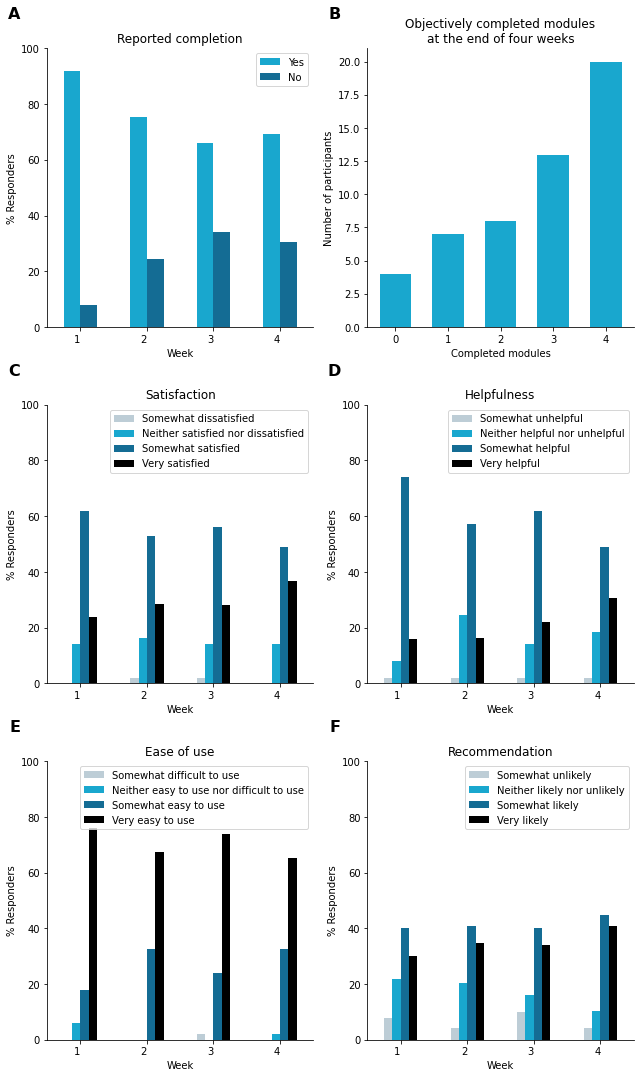

In [419]:
# Acceptability data
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_int = df[df['group'] == 'Intervention']

title = 'Reported completion'
variables = ['end_original_w']
order = {'end_original_w': ['Yes','No']}

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,15))

vix = 'end_original_w'
satis = df_int[[vix+"1",vix+"2",vix+"3",vix+"4"]]
satis = pd.melt(satis, value_vars = [vix+"1",vix+"2",vix+"3",vix+"4"])
freq = pd.crosstab(satis.variable, satis.value, normalize='index')*100
freq = freq[order[vix]]

ax = fig.add_subplot(3,2,1)
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
  fontsize=16, fontweight='bold', va='top', ha='right')

g = freq.plot(kind='bar', color=["#19A7CE","#146C94", "#000000"], ax = ax)
g.set(xticklabels = ['1','2','3','4'], ylim = (0,100), xlabel = 'Week', ylabel = '% Responders', title = title)
plt.xticks(rotation=360, ha='right')
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc=0, title='')

satis = df_int[['M0M1complete','M2complete',	'M3complete',	'M4complete']]
df = satis.mean(axis = 1)*4

ax = fig.add_subplot(3,2,2)
df.plot.hist(bins = [-0.3,0.3,0.7,1.3,1.7,2.3,2.7,3.3,3.7,4.3], color = ["#19A7CE"])
ax.set_xlabel('Completed modules')
ax.set_ylabel('Number of participants')
ax.set_title('Objectively completed modules\nat the end of four weeks')
ax.spines[['right', 'top']].set_visible(False)
ax.text(-0.1, 1.15, 'B', transform=ax.transAxes,
  fontsize=16, fontweight='bold', va='top', ha='right')



title = ['Satisfaction', 'Helpfulness', 'Ease of use', 'Recommendation', 'Completion']
variables = ['satis_original_w', 'help_original_w','easy_original_w','recc_original_w', 'end_original_w']

order = {'satis_original_w': ['Somewhat dissatisfied','Neither satisfied nor dissatisfied','Somewhat satisfied','Very satisfied'],
'help_original_w': ['Somewhat unhelpful','Neither helpful nor unhelpful','Somewhat helpful','Very helpful'],
'recc_original_w': ['Somewhat unlikely','Neither likely nor unlikely','Somewhat likely','Very likely'],
'easy_original_w': ['Somewhat difficult to use','Neither easy to use nor difficult to use','Somewhat easy to use','Very easy to use'],
'end_original_w': ['Yes','No']}

import matplotlib.pyplot as plt

for i, label in enumerate(('C', 'D', 'E', 'F')):
    vix = variables[i]
    satis = df_int[[vix+"1",vix+"2",vix+"3",vix+"4"]]
    satis = pd.melt(satis, value_vars = [vix+"1",vix+"2",vix+"3",vix+"4"])
    freq = pd.crosstab(satis.variable, satis.value, normalize='index')*100
    freq = freq[order[vix]]

    ax = fig.add_subplot(3,2,i+3)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

    g = freq.plot(kind='bar', color=["#BDCDD6", "#19A7CE","#146C94", "#000000"], ax = ax)
    g.set(xticklabels = ['1','2','3','4'], ylim = (0,100), xlabel = 'Week', ylabel = '% Responders', title = title[i])
    plt.xticks(rotation=360, ha='right')
    ax.spines[['right', 'top']].set_visible(False)
    ax.legend(loc=0, title='')

plt.tight_layout()
    
plt.show()

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1098844296.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1098844296.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4','5',"6"], ylim = (25,50), xlabel = 'Week', title='Intention-to-treat')
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1098844296.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4','5',"6"], ylim = (0,25), xlabel = 'Week', title='Intention-to-treat')
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1098844296.py:52: UserWarning: FixedFormatter sh

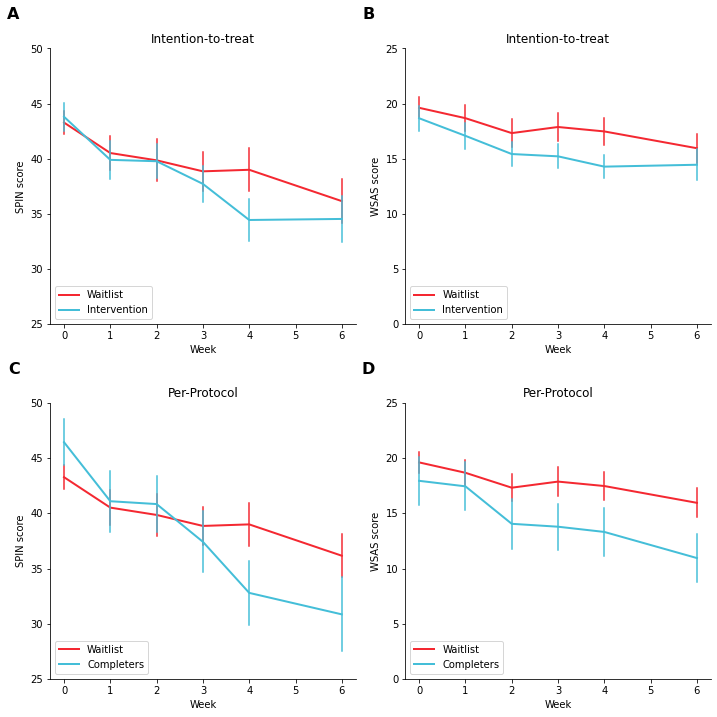

In [480]:

#Intention-to-treat analysis
df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
df["spintot_w5"] = np.nan

spin = df[["spintot_0","spintot_w1","spintot_w2","spintot_w3","spintot_w4","spintot_w5","spintot_w6","group"]]
spin_melted = spin.melt(id_vars = 'group', var_name="timepoint", value_name="SPIN score")

wsas = df[["wsastot_0","wsastot_w1","wsastot_w2","wsastot_w3","wsastot_w4","spintot_w5","wsastot_w6","group"]]
wsas_melted = wsas.melt(id_vars = 'group', var_name="timepoint", value_name="WSAS score")

fig = plt.figure(figsize=(10,10))
for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
    if i == 0:
        g = sns.lineplot(data=spin_melted, x = 'timepoint', y = 'SPIN score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        ax.legend(labels=["Waitlist","Intervention"], loc = 3)
        g.set(xticklabels = ['0','1','2','3','4','5',"6"], ylim = (25,50), xlabel = 'Week', title='Intention-to-treat')
        ax.spines[['right', 'top']].set_visible(False)

    else:
        g = sns.lineplot(data=wsas_melted, x = 'timepoint', y = 'WSAS score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        g.set(xticklabels = ['0','1','2','3','4','5',"6"], ylim = (0,25), xlabel = 'Week', title='Intention-to-treat')
        ax.spines[['right', 'top']].set_visible(False)
        ax.legend(labels=["Waitlist","Intervention"], loc = 3)


# Per-protocol analysis
df = df.drop(df[df.completed== 0].index)
df.head()

spin = df[["spintot_0","spintot_w1","spintot_w2","spintot_w3","spintot_w4","spintot_w5","spintot_w6","group"]]
spin_melted = spin.melt(id_vars = 'group', var_name="timepoint", value_name="SPIN score")

wsas = df[["wsastot_0","wsastot_w1","wsastot_w2","wsastot_w3","wsastot_w4","spintot_w5","wsastot_w6","group"]]
wsas_melted = wsas.melt(id_vars = 'group', var_name="timepoint", value_name="WSAS score")


for i, label in enumerate(('C', 'D')):
    ax = fig.add_subplot(2,2,i+3)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
    if i == 0:
        g = sns.lineplot(data=spin_melted, x = 'timepoint', y = 'SPIN score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        ax.legend(labels=["Waitlist","Completers"], loc = 3)
        g.set(xticklabels = ['0','1','2','3','4','5',"6"], ylim = (25,50), xlabel = 'Week', title='Per-Protocol')
        ax.spines[['right', 'top']].set_visible(False)

    else:
        g = sns.lineplot(data=wsas_melted, x = 'timepoint', y = 'WSAS score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        g.set(xticklabels = ['0','1','2','3','4','5',"6"], ylim = (0,25), xlabel = 'Week', title='Per-Protocol')
        ax.spines[['right', 'top']].set_visible(False)
        ax.legend(labels=["Waitlist","Completers"], loc = 3)

plt.tight_layout()

plt.savefig('waitlist_intervention.png', dpi=300)
plt.show()

In [474]:
# Regression analyses, intention-to-treat, SPIN
import statsmodels.api as sm

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


for time in ['spintot_w1', 'spintot_w2', 'spintot_w3', 'spintot_w4','spintot_w6']:
    d = df[['group','spintot_0','age',time]]

    just_dummies = pd.get_dummies(d['group'])
    step1 = pd.concat([d,just_dummies], axis = 1)

    result = sm.OLS(step1[time], sm.add_constant(step1[['spintot_0', 'Intervention','age']]), missing='drop').fit()
    print (result.summary())


                            OLS Regression Results                            
Dep. Variable:             spintot_w1   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     21.84
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           7.25e-11
Time:                        15:39:52   Log-Likelihood:                -360.24
No. Observations:                 100   AIC:                             728.5
Df Residuals:                      96   BIC:                             738.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.6286      7.465     -0.620   

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/533228099.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [481]:
# Regression analyses, intention-to-treat WSAS
import statsmodels.api as sm

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


for time in ['wsastot_w1', 'wsastot_w2', 'wsastot_w3', 'wsastot_w4','wsastot_w6']:
    d = df[['group','wsastot_0','age',time]]

    just_dummies = pd.get_dummies(d['group'])
    step1 = pd.concat([d,just_dummies], axis = 1)

    result = sm.OLS(step1[time], sm.add_constant(step1[['wsastot_0', 'Intervention','age']]), missing='drop').fit()
    print (result.summary())


                            OLS Regression Results                            
Dep. Variable:             wsastot_w1   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     56.64
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           3.66e-21
Time:                        16:09:46   Log-Likelihood:                -301.90
No. Observations:                 100   AIC:                             611.8
Df Residuals:                      96   BIC:                             622.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4965      3.632     -0.687   

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/2472515312.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [476]:
# Regression analyses, per-protocol, SPIN
import statsmodels.api as sm
df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
df = df.drop(df[df.completed== 0].index)


for time in ['spintot_w1', 'spintot_w2', 'spintot_w3', 'spintot_w4','spintot_w6']:
    d = df[['group','spintot_0','age',time]]

    just_dummies = pd.get_dummies(d['group'])
    step1 = pd.concat([d,just_dummies], axis = 1)

    result = sm.OLS(step1[time], sm.add_constant(step1[['spintot_0', 'Intervention','age']]), missing='drop').fit()
    print (result.summary())


                            OLS Regression Results                            
Dep. Variable:             spintot_w1   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     16.33
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           4.83e-08
Time:                        15:50:12   Log-Likelihood:                -249.54
No. Observations:                  70   AIC:                             507.1
Df Residuals:                      66   BIC:                             516.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.9571      8.860     -0.672   

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1779505229.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [477]:
# Regression analyses, per-protocol WSAS
import statsmodels.api as sm

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
df = df.drop(df[df.completed== 0].index)


for time in ['wsastot_w1', 'wsastot_w2', 'wsastot_w3', 'wsastot_w4','wsastot_w6']:
    d = df[['group','wsastot_0','age',time]]

    just_dummies = pd.get_dummies(d['group'])
    step1 = pd.concat([d,just_dummies], axis = 1)

    result = sm.OLS(step1[time], sm.add_constant(step1[['wsastot_0', 'Intervention','age']]), missing='drop').fit()
    print (result.summary())


                            OLS Regression Results                            
Dep. Variable:             wsastot_w1   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     48.15
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.31e-16
Time:                        15:55:42   Log-Likelihood:                -209.75
No. Observations:                  70   AIC:                             427.5
Df Residuals:                      66   BIC:                             436.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.2403      4.202     -1.485   

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1862975686.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [472]:
print('\n\Reliable improvement SPIN:')
df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
df['reliable_improvement'] = (df['spintot_0'] - df['spintot_w4']) 

observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)

rel_observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False, normalize='columns')
print(rel_observations)


\Reliable improvement SPIN:
group                 Intervention  Waitlist
reliable_improvement                        
False                           28        40
True                            24        10
chi2 =  6.7133653846153845
p =  0.009569296332157959
group                 Intervention  Waitlist
reliable_improvement                        
False                     0.538462       0.8
True                      0.461538       0.2


/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1781647247.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [473]:
print('\nReliable improvement SPIN, per-protocol:')
df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
df = df.drop(df[df.completed== 0].index)
df['reliable_improvement'] = (df['spintot_0'] - df['spintot_w4']) 

observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)

rel_observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False, normalize='columns')
print(rel_observations)


Reliable improvement SPIN, per-protocol:
group                 Intervention  Waitlist
reliable_improvement                        
False                            6        40
True                            14        10
chi2 =  13.709918478260873
p =  0.0002133248916488108
group                 Intervention  Waitlist
reliable_improvement                        
False                          0.3       0.8
True                           0.7       0.2


/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/1906002275.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [479]:
print('\nReliable improvement SPIN, ITT, week 6:')
df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)

df['reliable_improvement'] = (df['spintot_0'] - df['spintot_w6']) 

observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)

rel_observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False, normalize='columns')
print(rel_observations)


Reliable improvement SPIN, ITT, week 6:
group                 Intervention  Waitlist
reliable_improvement                        
False                           31        35
True                            21        15
chi2 =  0.791896853146854
p =  0.3735271743967694
group                 Intervention  Waitlist
reliable_improvement                        
False                     0.596154       0.7
True                      0.403846       0.3


/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/835347084.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)


In [478]:
print('\nReliable improvement SPIN, per-protocol, week 6:')
df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
df = df.drop(df[df.completed== 0].index)
df['reliable_improvement'] = (df['spintot_0'] - df['spintot_w6']) 

observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)
print(observations)
print("chi2 = ", chi2)
print("p = ", p)

rel_observations = pd.crosstab(index=df["reliable_improvement"]>=10, columns=df["group"],margins=False, normalize='columns')
print(rel_observations)


Reliable improvement SPIN, per-protocol, week 6:
group                 Intervention  Waitlist
reliable_improvement                        
False                            6        35
True                            14        15
chi2 =  7.843355761143817
p =  0.005100783069968119
group                 Intervention  Waitlist
reliable_improvement                        
False                          0.3       0.7
True                           0.7       0.3


/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_8359/3974307985.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
